In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Data/feature_frame.csv')

print(df.shape) 
print(df.info())

(2880549, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults          

In [2]:
print(df['product_type'].value_counts().head(20))

product_type
tinspackagedfoods           226474
condimentsdressings         129749
ricepastapulses             128098
haircare                    114978
cookingingredientsoils      110686
longlifemilksubstitutes     110235
dishwasherdetergent          98144
cereal                       90898
bathroomlimescalecleaner     82632
kidssnacks                   72554
snacksconfectionery          66445
jamhoneyspreads              64627
dental                       64319
bathshowergel                58525
coffee                       58068
handsoapsanitisers           57432
pickledfoodolives            55497
homebaking                   54868
babytoiletries               54442
nappies                      54336
Name: count, dtype: int64


In [3]:
print(df['vendor'].value_counts().head(20))

vendor
biona               146828
ecover              113018
method               79258
organix              74632
treeoflife           68920
huggies              44765
bulldog              42739
clearspring          41352
cooksco              39960
faithinnature        37906
biod                 37906
rudehealth           37896
lovebeautyplanet     34460
johnsons             34383
totm                 33339
lilyskitchen         27568
ellaskitchen         25956
heinz                25056
vaseline             24122
persil               24122
Name: count, dtype: int64


In [4]:
print(df['ordered_before'].value_counts())

ordered_before
0.0    2819658
1.0      60891
Name: count, dtype: int64


In [5]:
print(df['abandoned_before'].value_counts())

abandoned_before
0.0    2878794
1.0       1755
Name: count, dtype: int64


In [6]:
print(df['active_snoozed'].value_counts())

active_snoozed
0.0    2873952
1.0       6597
Name: count, dtype: int64


In [7]:
print(df['set_as_regular'].value_counts())

set_as_regular
0.0    2870093
1.0      10456
Name: count, dtype: int64


In [8]:
info = ['variant_id', 'order_id', 'user_id', 'created_at', 'order_date']

label = 'outcome'

feature = [col for col in df.columns if col not in info + [label]]
print(feature)

['product_type', 'user_order_seq', 'ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular', 'normalised_price', 'discount_pct', 'vendor', 'global_popularity', 'count_adults', 'count_children', 'count_babies', 'count_pets', 'people_ex_baby', 'days_since_purchase_variant_id', 'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id', 'days_since_purchase_product_type', 'avg_days_to_buy_product_type', 'std_days_to_buy_product_type']


In [9]:
categorical_features = ['product_type', 'vendor']

binary_features = ['ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']

numerical_features = [col for col in feature if col not in categorical_features + binary_features]

print(numerical_features)


['user_order_seq', 'normalised_price', 'discount_pct', 'global_popularity', 'count_adults', 'count_children', 'count_babies', 'count_pets', 'people_ex_baby', 'days_since_purchase_variant_id', 'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id', 'days_since_purchase_product_type', 'avg_days_to_buy_product_type', 'std_days_to_buy_product_type']


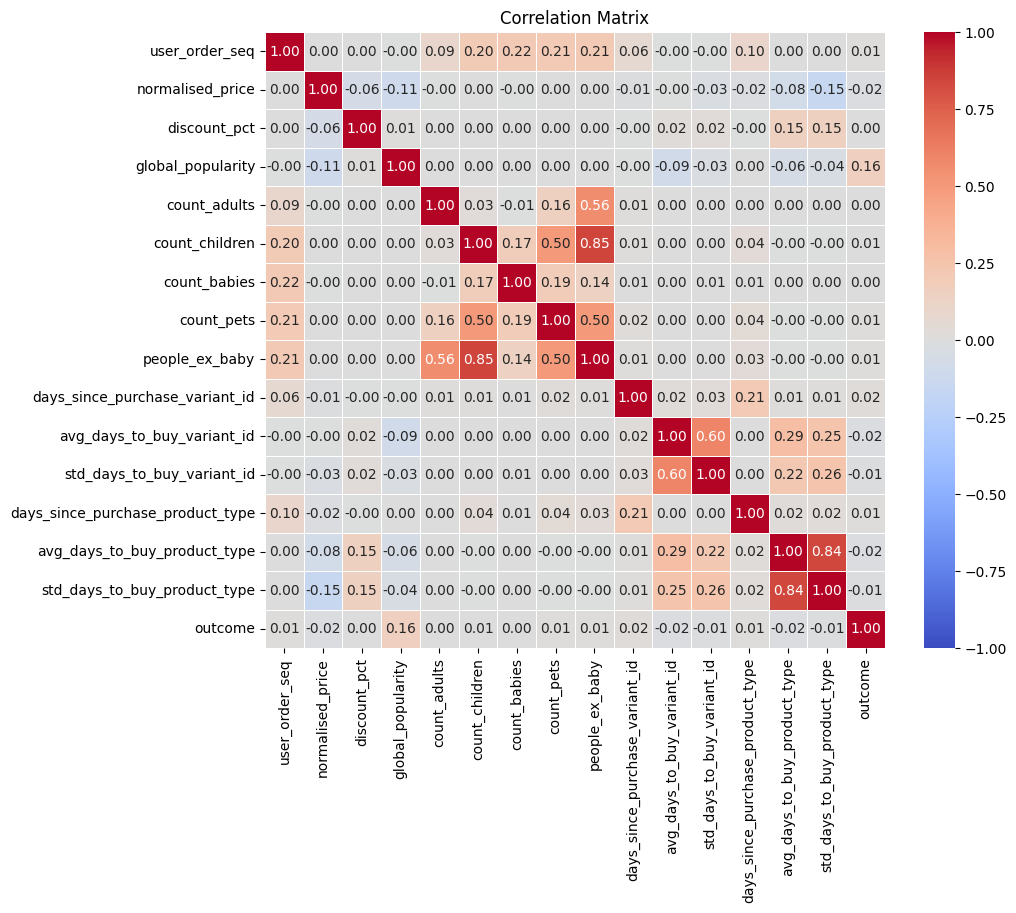

In [10]:
correlacion = df[numerical_features + [label]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

En esta tabla se puede ver la correlación de los distintos atributos.